In [1]:
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.applications import MobileNetV2
import numpy as np
import cv2
import matplotlib.pyplot as plt

C:\Users\User\AppData\Roaming\Python\Python311\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\User\AppData\Roaming\Python\Python311\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\User\AppData\Roaming\Python\Python311\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/resource_handle.proto. Please upd

In [ ]:
#model architecture
IMAGE_SHAPE = (224, 224, 3) 
NUM_CLASSES = 11

#base model
base_model = MobileNetV2(
    input_shape=IMAGE_SHAPE,
    include_top=False,
    weights=None
)
base_model.trainable = True

#full model
inputs = tf.keras.Input(shape=IMAGE_SHAPE)
x = tf.keras.applications.mobilenet_v2.preprocess_input(inputs) 
x = base_model(x, training=False) 
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(NUM_CLASSES, activation='softmax')(x)
model = Model(inputs, outputs)

print("Model architecture built.")

Model architecture built.


In [ ]:
model_path = "D:\sem 5\DL\Project\dataset_resnet/mio_tcd_classifier_final.h5"
model.load_weights(model_path)

print(f"Weights loaded successfully from {model_path}")

Weights loaded successfully from D:\sem 5\DL\Project\dataset_resnet/mio_tcd_classifier_final.h5


In [ ]:
CLASS_NAMES = [
    'Articulated truck',
    'Bicycle',
    'Bus',
    'Car',
    'Motorcycle',
    'Non-motorized vehicle',
    'Pedestrian',
    'Pickup truck',
    'Single unit truck',
    'Work van',
    'Background'
]

print(f"Loaded {len(CLASS_NAMES)} class names.")

Loaded 11 class names.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


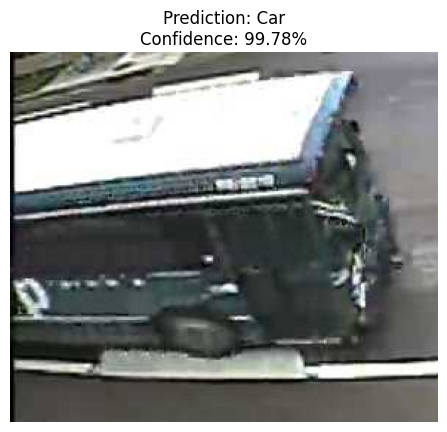

Predicted class: Car
Confidence score: 99.78%


In [ ]:
image_path = r"D:\sem 5\DL\Project\dataset_resnet\MIO-TCD-Classification\train\bus\00011151.jpg"

img = cv2.imread(image_path)

if img is None:
    print(f"Error: Could not load image from path: {image_path}")
    print("Please check the file path and make sure the file is a valid image.")
else:
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img_rgb, (224, 224))
    img_batch = np.expand_dims(img_resized, axis=0)

    predictions = model.predict(img_batch)
    scores = predictions[0]

    predicted_class_index = np.argmax(scores)
    predicted_class_name = CLASS_NAMES[predicted_class_index]
    confidence = np.max(scores) * 100

    plt.imshow(img_rgb) 
    plt.title(f"Prediction: {predicted_class_name}\nConfidence: {confidence:.2f}%")
    plt.axis("off")
    plt.show()

    print(f"Predicted class: {predicted_class_name}")
    print(f"Confidence score: {confidence:.2f}%")